In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from plotter import Plotter
%matplotlib inline

Set the directory of the records and the save path of the plot. For example, if one want to plot the result of BIBD model and BIBD&GC model, one needs to modify the codes of the $\#\#$ blocks.

`
path = './figures/ResNet_BIBD_BIBD&GC.png'
models = ['BIBD', "BIBD_GC"]
`

The names in the `models` should be consistent with the result folder name. We assume that for each model we have 20 records, and each record has 75 epoches.

In [33]:
############################################################################
##                                                                        ##
## set the save path of the figures                                       ##
path = './figures/ResNet_4_models.png' 
##                                                                        ##  
## set the dir of the records                                             ##
models = ['origin','BIBD', "GC", "ENS", "BIBD_GC", 'BIBD_ENS', 'ENS_GC', 'BIBD_GC_ENS']                                        
labels = ['origin','BIBD', "GC", "ENS", "BIBD_GC", 'BIBD_ENS', 'ENS_GC', 'BIBD_GC_ENS']
##                                                                        ##
############################################################################

train_acc_files = ['./results/'+name+'/train_acc_' for name in models]
train_loss_files = ['./results/'+name+'/train_loss_' for name in models]
test_acc_files = ['./results/'+name+'/test_acc_' for name in models]
test_loss_files = ['./results/'+name+'/test_loss_' for name in models]

train_acc = None
train_loss = None
test_acc = None
test_loss = None

for n in range(len(models)):
    train_acc_temp = 0
    train_loss_temp = 0
    test_acc_temp = 0
    test_loss_temp = 0
    for i in range(20): # accumulate models[n]'s 20 results
        train_acc_temp += genfromtxt(train_acc_files[n] + str(i + 1) + '.csv', delimiter = ',')
        train_loss_temp += genfromtxt(train_loss_files[n] + str(i + 1) + '.csv', delimiter = ',')
        test_acc_temp += genfromtxt(test_acc_files[n] + str(i + 1) + '.csv', delimiter = ',')
        test_loss_temp += genfromtxt(test_loss_files[n] + str(i + 1) + '.csv', delimiter = ',')
    # taking average
    if type(train_acc) != type(train_acc_temp):
        train_acc = (train_acc_temp / 20).reshape(-1,1)
        train_loss = (train_loss_temp / 20).reshape(-1,1)
        test_acc = (test_acc_temp / 20).reshape(-1,1)
        test_loss = (test_loss_temp / 20).reshape(-1,1)
    else:
        train_acc = np.append(train_acc, (train_acc_temp / 20).reshape(len(train_acc_temp),-1), 1)
        train_loss = np.append(train_loss, (train_loss_temp / 20).reshape(len(train_loss_temp),-1), 1)
        test_acc = np.append(test_acc, (test_acc_temp / 20).reshape(len(test_acc_temp),-1), 1)
        test_loss = np.append(test_loss, (test_loss_temp / 20).reshape(len(test_loss_temp),-1), 1)

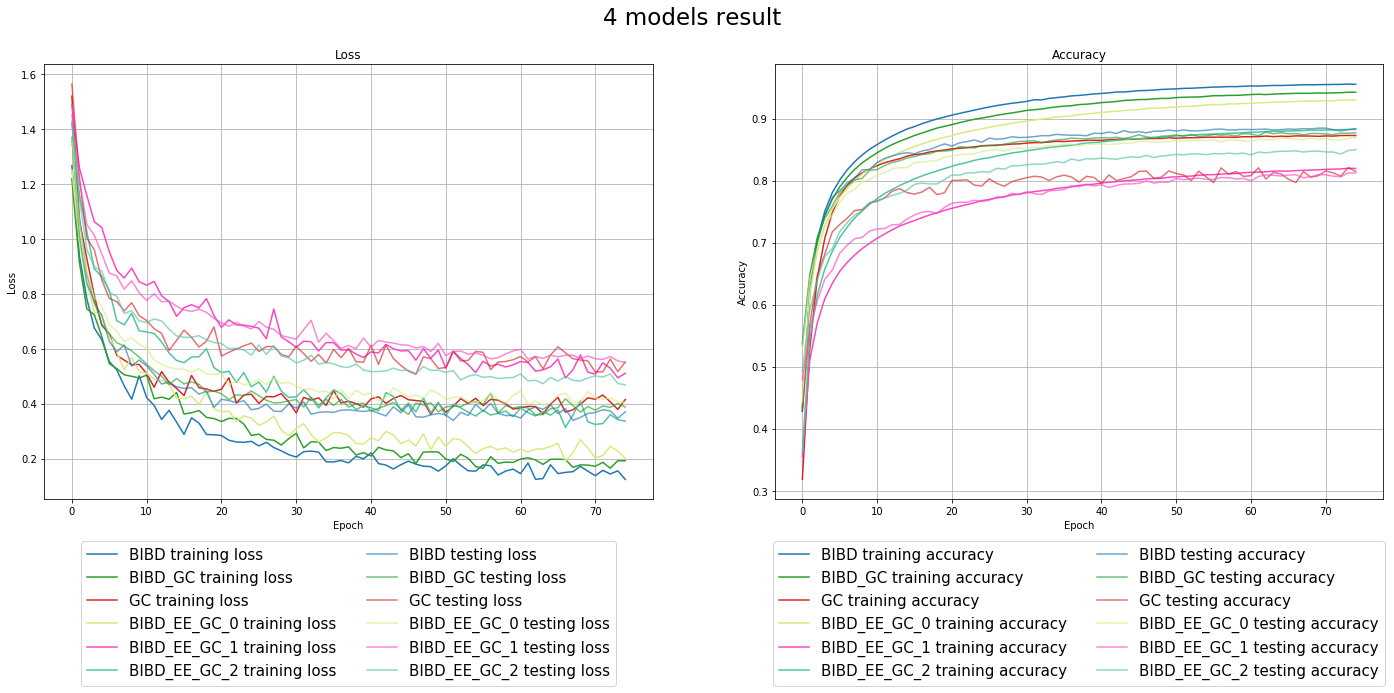

In [19]:
############################################################################
##                                                                        ##
plotter = Plotter(title="4 models result",
                         save_to_filepath=path)                           ##
plotter.plot_values(labels, train_loss, test_loss, train_acc, test_acc)   ##
##                                                                        ##
############################################################################